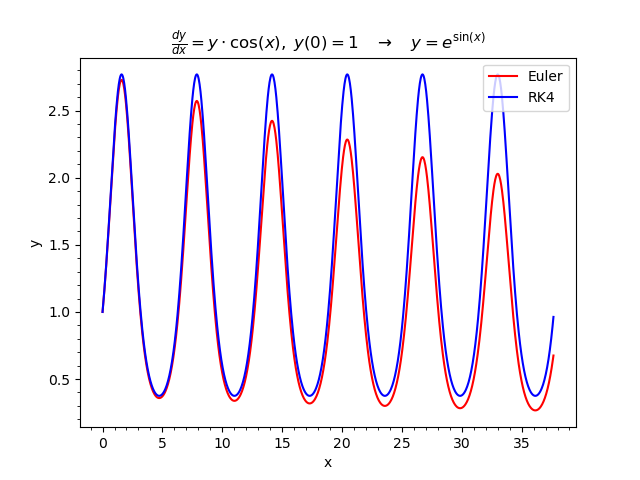

In [1]:
# rk4_nonlinear_ode.ipynb

# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator


def d_y(y, x):
    # y' = cos(x) * y, therefore y = e^sin(x)
    return np.cos(x) * y


def euler(v1, u, h, f1):
    # Implements Euler's method
    # for a single ODE (f1), with one
    # dependent variable (v1) and the
    # independent variable (u) having step size (h)
    next_v1 = v1 + f1(v1, u) * h
    next_u = u + h
    return next_v1, next_u


def rk4(v1, u, h, f1):
    # Implements 4th order Runge-Kutta method
    # for a single ODE (f1), with one
    # dependent variable (v1) and the
    # independent variable (u) having step size (h)
    k1_v1 = f1(v1, u)
    k2_v1 = f1(v1 + (h / 2.0) * k1_v1, u)
    k3_v1 = f1(v1 + (h / 2.0) * k2_v1, u)
    k4_v1 = f1(v1 + h * k3_v1, u)
    next_v1 = v1 + h * (k1_v1 + 2.0 * k2_v1 + 2.0 * k3_v1 + k4_v1) / 6.0
    next_u = u + h
    return next_v1, next_u


def plot(ax):
    steps = 1000
    dx = 12 * np.pi / steps

    xa_euler = np.zeros(steps)
    ya_euler = np.zeros(steps)

    xa_rk4 = np.zeros(steps)
    ya_rk4 = np.zeros(steps)

    # Initial values
    xa_euler[0] = 0
    ya_euler[0] = 1
    xa_rk4[0] = 0
    ya_rk4[0] = 1

    x_euler = xa_euler[0]
    y_euler = ya_euler[0]
    x_rk4 = xa_rk4[0]
    y_rk4 = ya_rk4[0]

    for step in range(1, steps):
        y_euler, x_euler = euler(y_euler, x_euler, dx, d_y)
        y_rk4, x_rk4 = rk4(y_rk4, x_rk4, dx, d_y)
        xa_euler[step] = x_euler
        ya_euler[step] = y_euler
        xa_rk4[step] = x_rk4
        ya_rk4[step] = y_rk4

    ax.set_title(
        r"$\frac{dy}{dx} = y\cdot\cos(x),\; y(0)=1\quad\rightarrow\quad y=e^{\sin(x)}$"
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.plot(xa_euler, ya_euler, label="Euler", color="red", linestyle="solid")
    ax.plot(xa_rk4, ya_rk4, label="RK4", color="blue", linestyle="solid")

    ax.legend(loc="best")

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()